BASIC STATISTICS

In [1]:
import pandas as pd

df = pd.read_csv("sales_data_with_discounts.csv")
print(df.head())
print(df.info())


         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
<class '

The dataset is imported using pd.read_csv() to load it into a pandas DataFrame.
head() is used to preview the first few rows, giving a snapshot of the data.
info() provides essential details such as column names, data types, and any missing values.

In [13]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


Explanation
Separates numerical and categorical columns.

Helps choose appropriate techniques

In [12]:
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

explanation:
we used this for to know what the categorical values are.

In [14]:
num_cols 

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Explanation: we used this to know what the numerical values are.

In [15]:
desc_stats = df[numerical_cols].describe().T
mode_vals = df[numerical_cols].mode().iloc[0]
desc_stats['mode'] = mode_vals
print(desc_stats)


                   count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  
Volume                4.000000      6.000000      31.000000      3.000000  
Avg Price          1450.000000  10100.000000   60100.000000    400.000000  
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000  
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822  
Discount Amount     988.933733   5316.495427   25738

 Explanation
describe() gives mean, std, min, max, and percentiles.

mode() finds the most frequent values.
Mean and Median indicate average sales/discount.

Standard deviation reveals variation.

Mode shows common values.

Skewed distributions may be inferred from differences between mean and median.



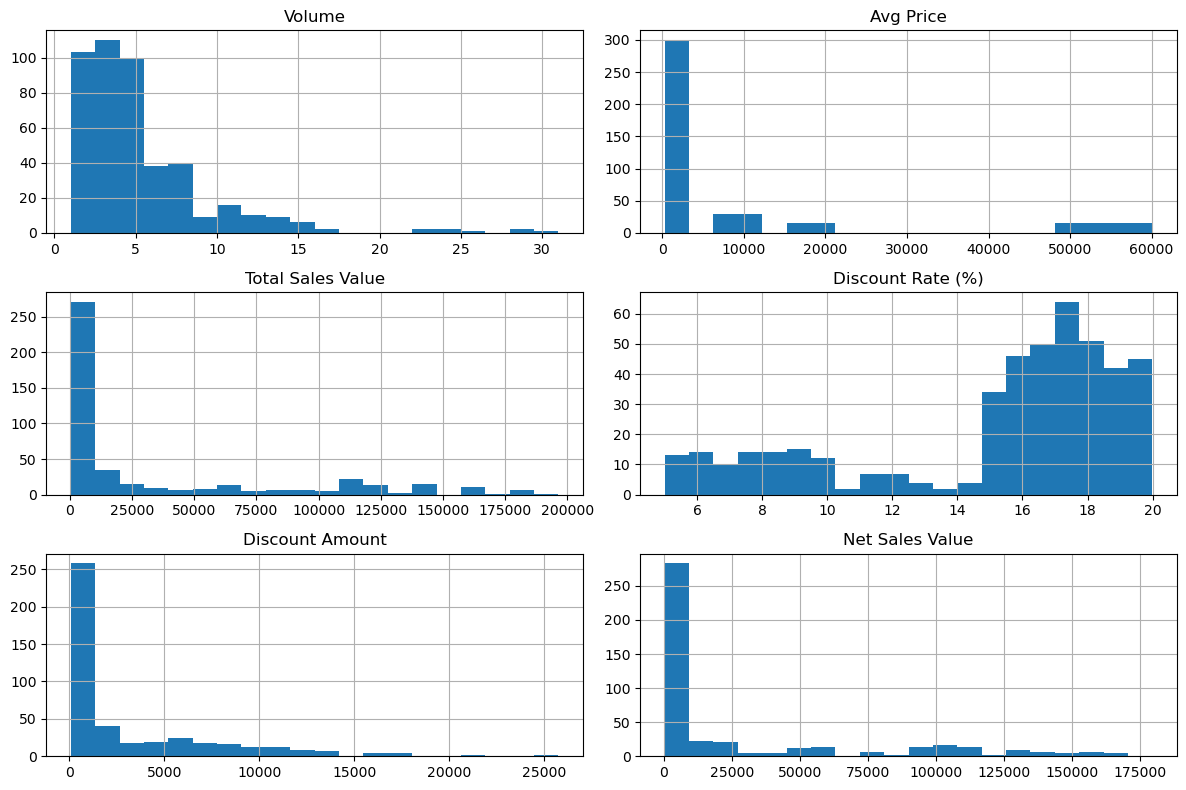

In [4]:
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


 Explanation
Plots distribution for each numerical column.

 
Identify distribution shape, skewness, and possible outliers.


Right- or left-skewed distributions.

Some variables may be normally distributed.

Sales data may have long tails or clustering.

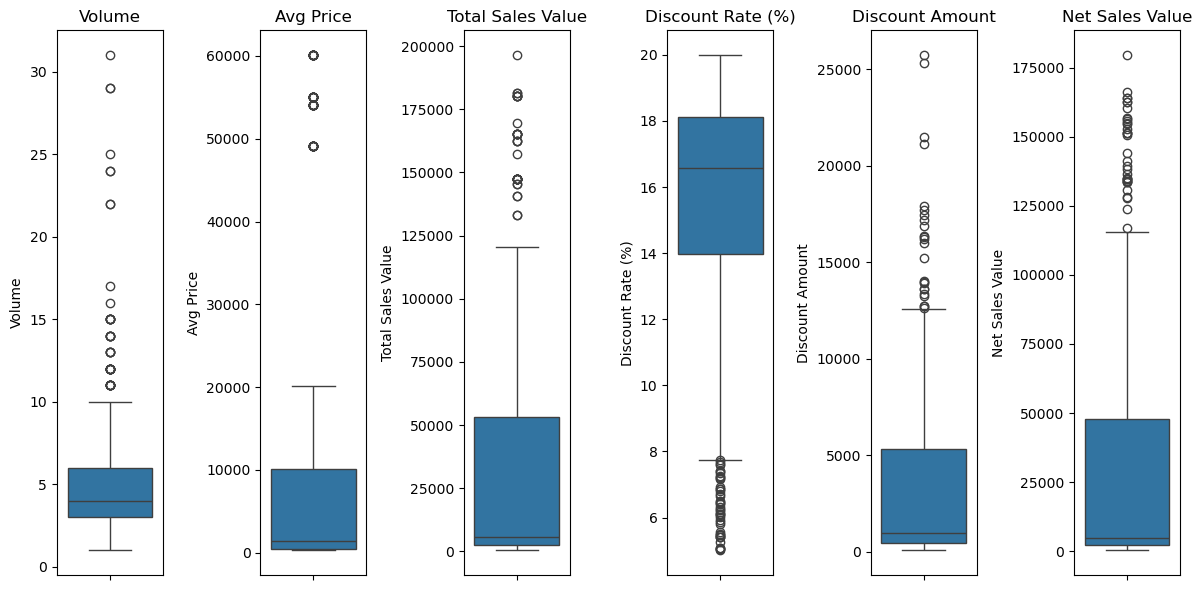

In [5]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Explanation
Shows interquartile range and highlights outliers.


Detect outliers and spread of data.


Variables with outliers identified.

Helps decide if preprocessing like transformation or outlier removal is needed.

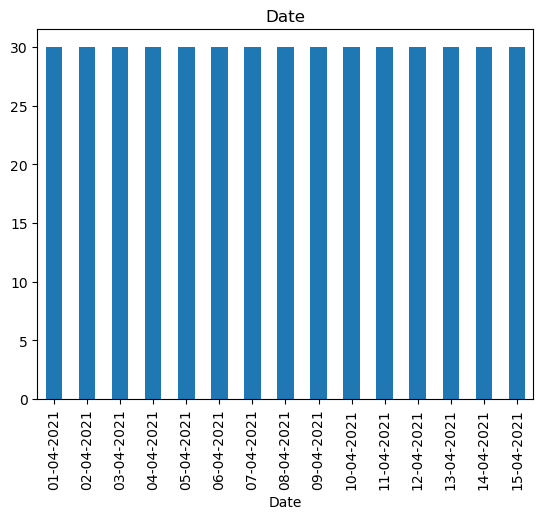

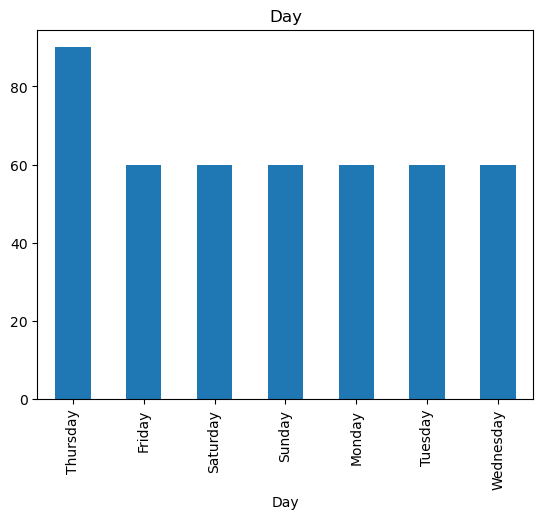

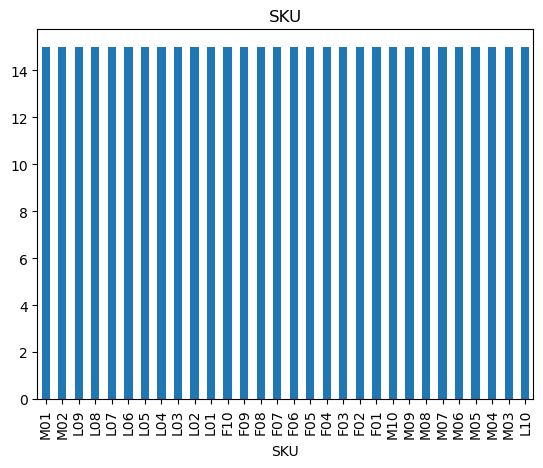

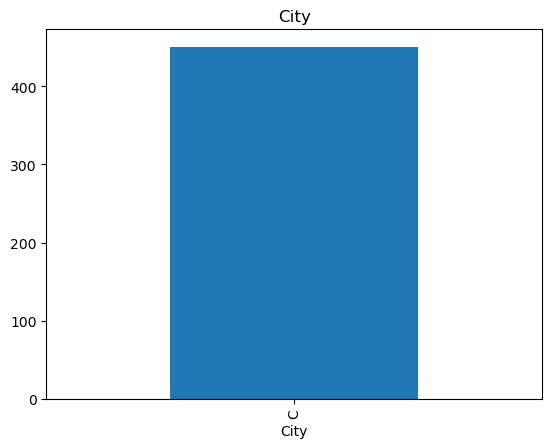

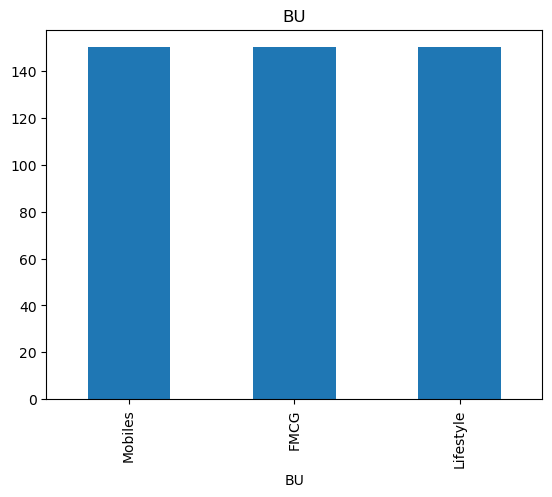

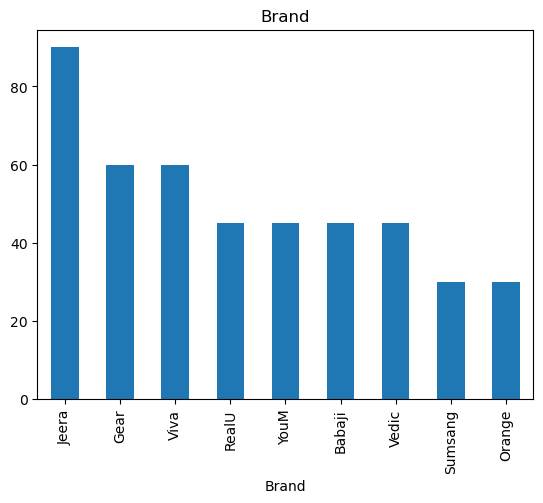

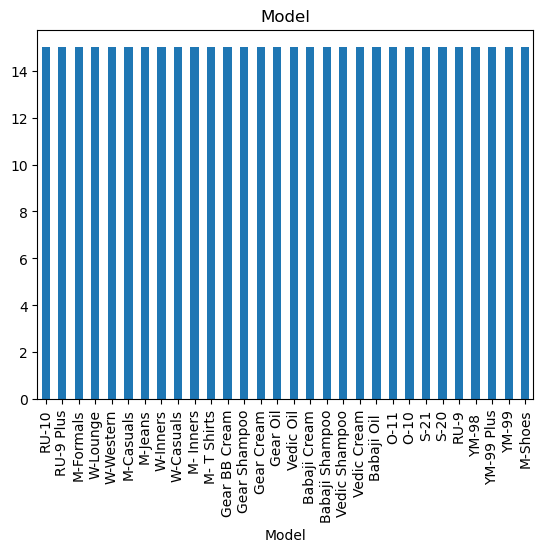

In [6]:
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()


Explanation
Plots the frequency of each category in categorical columns.


Understand class distribution and dominance.


Identifies the most common regions/products.

May help in targeting segments.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Explanation
Scales all numerical features to have a mean of 0 and std of 1 using Z = (x - μ)/σ.


Removes scale bias before ML models (e.g., distance-based models).


All features brought to a uniform scale.

Distributions are now centred at 0.

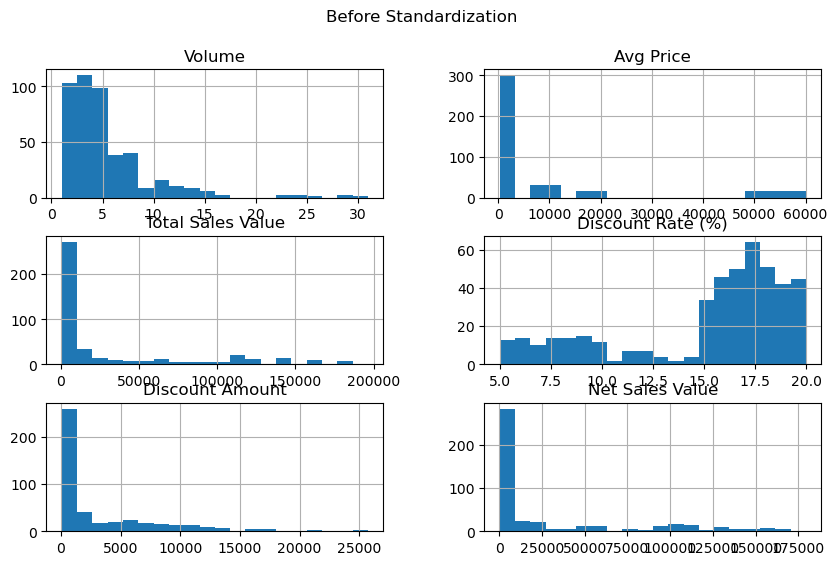

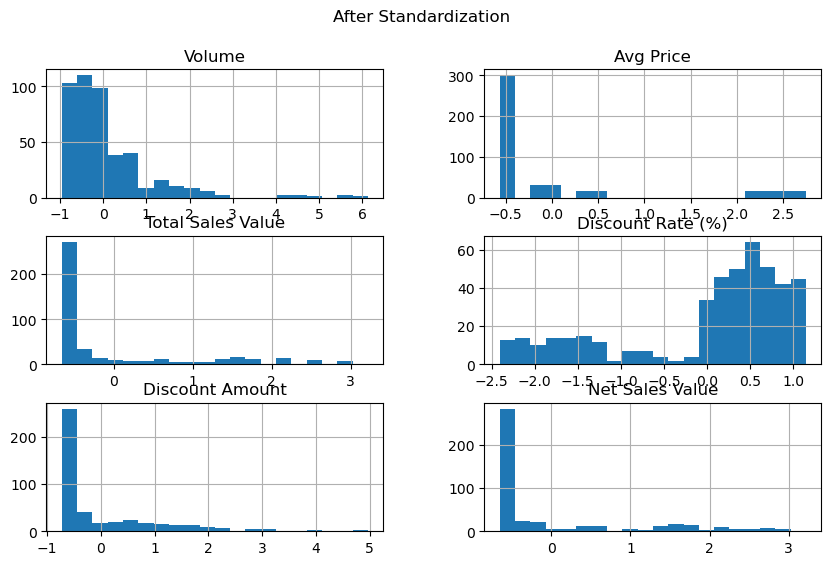

In [8]:
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Before Standardization")
plt.show()

df_standardized[numerical_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("After Standardization")
plt.show()


Explanation
Converts categorical variables into binary columns.

E.g., a region with 3 values becomes region_A, region_B, and region_C.


Prepares categorical data for machine learning models that require numerical input.

Dataset becomes fully numeric.

Increases dimensionality but makes data ML-ready.

In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...